# по новому

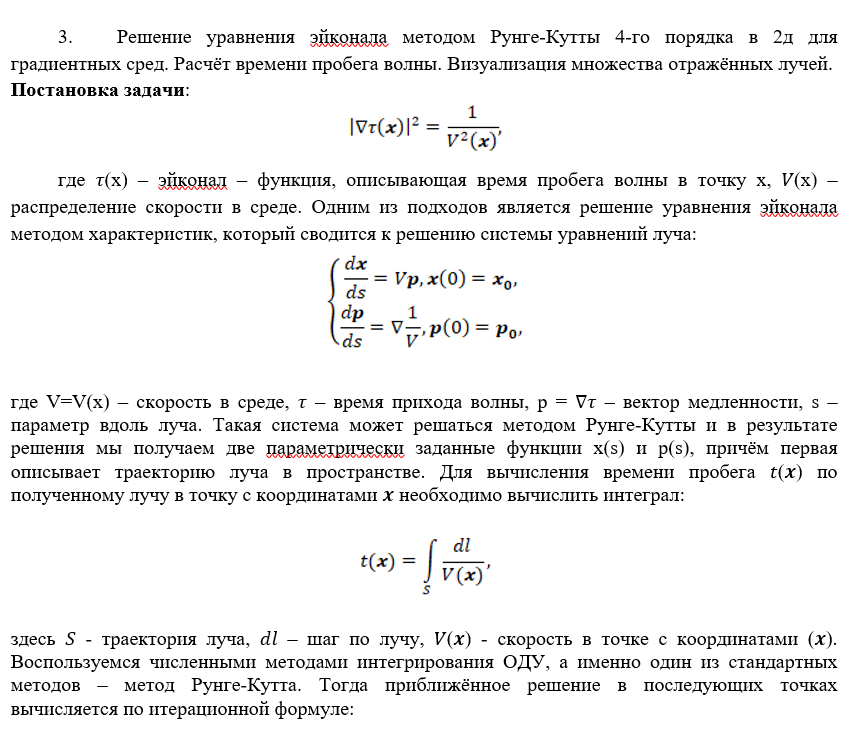

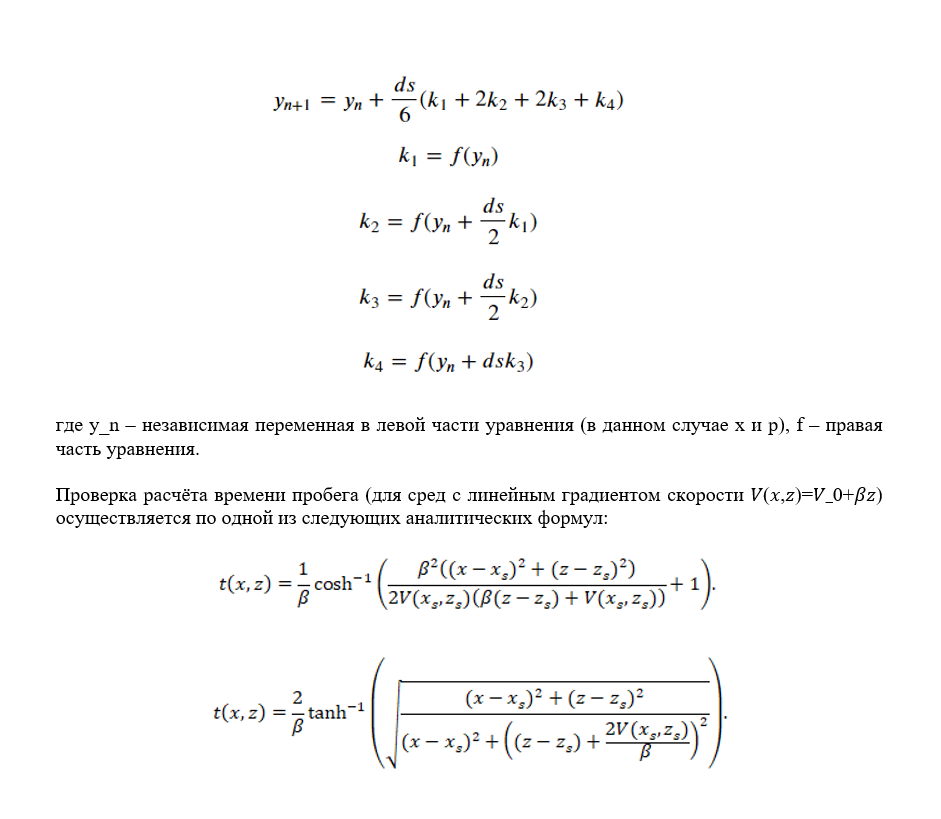

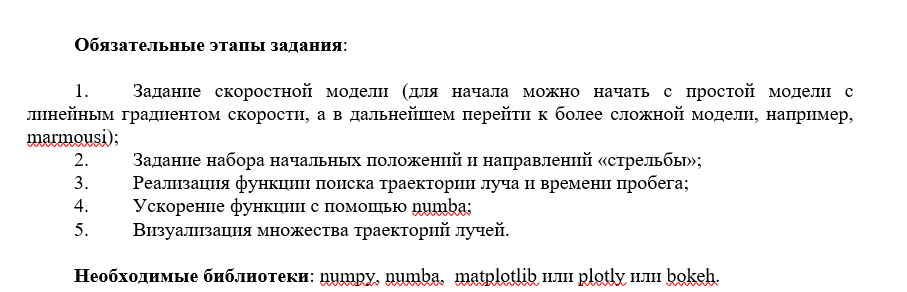

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import matplotlib.pyplot as plt


In [ ]:
v_0 = 1000
alpha = 60
dx = 1
dz = 1

x_set = np.arange(0, 1500 + dx, dx)
z_set = np.arange(0, 1500 + dz, dz)

velocity = np.zeros((len(z_set), len(x_set)))

for i in range(len(z_set)):
    velocity[i,:] = v_0 + alpha*(z_set[i])**(1/2)
print (velocity)
grad_z = np.gradient(1/velocity, axis = 0)
grad_x = np.gradient(1/velocity, axis = 1)


[[1000.         1000.         1000.         ... 1000.
  1000.         1000.        ]
 [1060.         1060.         1060.         ... 1060.
  1060.         1060.        ]
 [1084.85281374 1084.85281374 1084.85281374 ... 1084.85281374
  1084.85281374 1084.85281374]
 ...
 [3322.24029764 3322.24029764 3322.24029764 ... 3322.24029764
  3322.24029764 3322.24029764]
 [3323.01528191 3323.01528191 3323.01528191 ... 3323.01528191
  3323.01528191 3323.01528191]
 [3323.79000772 3323.79000772 3323.79000772 ... 3323.79000772
  3323.79000772 3323.79000772]]


In [ ]:
p_0 = [1, 1]
x_0 = [10, 5]
travel_time = np.zeros(2)
x = np.vstack((x_0, np.zeros(2)))
p = np.vstack((p_0, np.zeros(2)))
p = p/np.linalg.norm(p)
p /= v_0
ds = np.sqrt(dx**2+dz**2)
arr_x = []
arr_p = []
arr_t = []
#новое!
#tprov_values = []

In [ ]:
###@njit
def func(x:np.array, x_set:np.array, z_set:np.array, velocity:np.array, p:np.array, ds:np.float64):
    i = 1
    while x_set[0] < x[i-1][0]+ds <= x_set[-1] and z_set[0] <= x[i-1][1]+ds <= z_set[-1]:
      x_i_1 = int(x[i-1][0])
      z_i_1 = int(x[i-1][1])
      k1_x = velocity[z_i_1,x_i_1]*p[i-1]


      x_i_2 = int(x[i-1][0] + ds*k1_x[0]/2)
      z_i_2 = int(x[i-1][1] + ds*k1_x[1]/2)
      k2_x = (velocity[z_i_2][x_i_2])*(p[i-1])

      x_i_3 = int(x[i-1][0] + ds*k2_x[0]/2)
      z_i_3 = int(x[i-1][1] + ds*k2_x[1]/2)
      k3_x = (velocity[z_i_3][x_i_3])*(p[i-1])

      x_i_4 = int(x[i-1][0] + ds*k3_x[0])
      z_i_4 = int(x[i-1][1] + ds*k3_x[1])
      k4_x = (velocity[z_i_4][x_i_4])*(p[i-1])

      x_i_1p = int(x[i-1][0])
      z_i_1p = int(x[i-1][1])
      k1_p = np.array([grad_x[z_i_1p][x_i_1p], grad_z[z_i_1p][x_i_1p]])

      x_i_2p = int(x[i-1][0] + ds*k1_p[0]/2)
      z_i_2p = int(x[i-1][1] + ds*k1_p[1]/2)
      k2_p = np.array([grad_x[z_i_2p][x_i_2p], grad_z[z_i_2p][x_i_2p]])

      x_i_3p = int(x[i-1][0] + ds*k2_p[0]/2)
      z_i_3p = int(x[i-1][1] + ds*k2_p[1]/2)
      k3_p = np.array([grad_x[z_i_3p][x_i_3p], grad_z[z_i_3p][x_i_3p]])

      x_i_4p = int(x[i-1][0] + ds*k3_p[0])
      z_i_4p = int(x[i-1][1] + ds*k3_p[1])
      k4_p = np.array([grad_x[z_i_4p][x_i_4p], grad_z[z_i_4p][x_i_4p]])


      x[i] = x[i-1] + ds*(k1_x + k2_x + k3_x + k4_x)/6


      p[i] = p[i-1] + ds*(k1_p + k2_p + k3_p + k4_p)/6

      arr_p.append(p[i])


      #новое!
      #g = np.sqrt(((x[i][0] - dx)**2 + (x[i][1] - dz)**2))/(((x[i][0] - dx)**2) +((x[i][1] - dz)++(2*velocity/alpha))**2)
      #tprov = 0.5*alpha*(1/np.tanh(g))
      #tprov_values.append(tprov)

      x_i_t = int(x[i][0])
      z_i_t = int(x[i][1])
      dl = np.sqrt((x[i,0] - x[i-1,0])**2 + (x[i,1] - x[i-1,1])**2)
      v_1 = velocity[z_i_1, x_i_1]
      v_2 = velocity[z_i_t, x_i_t]

      v_mean = (v_1 + v_2) / 2

      t_i = dl / v_mean

      #travel_time = np.hstack((travel_time,t_i))

      i += 1
      x = np.vstack((x, np.zeros(2)))
      p = np.vstack((p, np.zeros(2)))
    return x

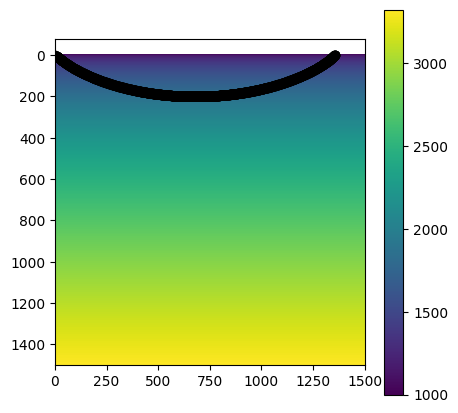

[[ 1.00000000e+01  5.00000000e+00]
 [ 1.07582436e+01  5.75824360e+00]
 [ 1.15207556e+01  6.50887887e+00]
 ...
 [ 1.35491855e+03 -4.17786535e-01]
 [ 1.35674659e+03 -2.70251102e+00]
 [ 0.00000000e+00  0.00000000e+00]]


In [ ]:
xx = func(x, x_set, z_set, velocity, p, ds)
fig = plt.figure(figsize = (5,5), frameon = True)
ax = fig.add_subplot()
im = plt.imshow(velocity)
plt.colorbar()
plt.scatter(xx[:, 0], xx[:, 1], c='black')
plt.show()
print (xx)

#новое!
#print(tprov_values)

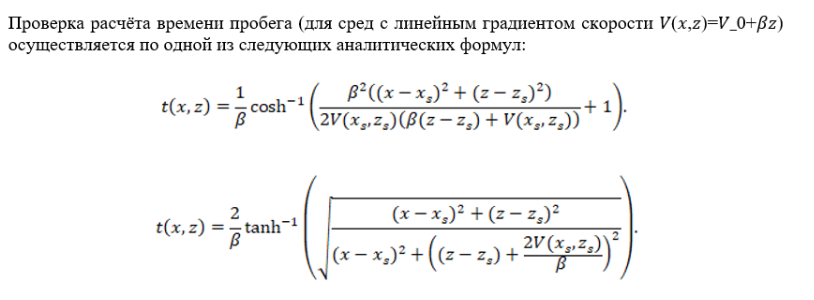

[0.64097462 0.6180557  0.59541674 ... 4.13861811 4.14137963 4.80209574]


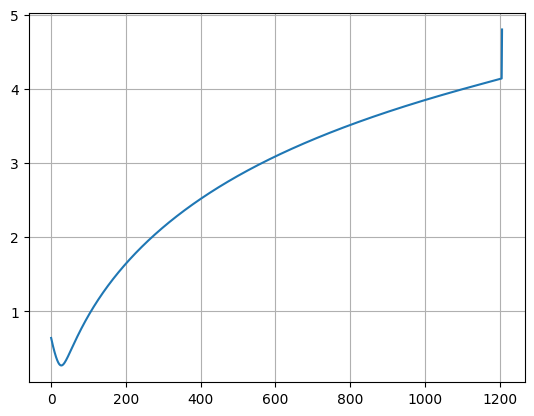

In [ ]:
def vel_at_point(velocity, xs, zs):
  return velocity[int(xs)][int(zs)]
x1 = np.linspace(0, 1207, 1207)
z = np.linspace(0, 1207, 1207)
d = alpha*(z-xx[:,1])+vel_at_point(velocity, xx[0][0], xx[0][1])
t1 = np.arccosh(alpha**2*((x1-xx[:,0])**2+(z-xx[:,1])**2)/(2*vel_at_point(velocity, xx[0][0], xx[0][1])*d)+1)
plt.plot(t1, label = 'arccosh')
plt.grid()
print (t1)